# 라이브러리 로드

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np 
import pandas as pd
import category_encoders as ce
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')


# 데이터 로드

In [30]:
train = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\train.csv")
test = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\test.csv")
submission = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\submission.csv")

## train data

In [31]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [33]:
train.shape

(916, 12)

## test data

In [34]:
test.head()

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   pclass       393 non-null    int64  
 2   name         393 non-null    object 
 3   gender       393 non-null    object 
 4   age          310 non-null    float64
 5   sibsp        393 non-null    int64  
 6   parch        393 non-null    int64  
 7   ticket       393 non-null    object 
 8   fare         392 non-null    float64
 9   cabin        97 non-null     object 
 10  embarked     392 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 33.9+ KB


In [36]:
test.shape

(393, 11)

## submission data

In [37]:
submission.head()

,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [38]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   survived     393 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


In [39]:
submission.shape

(393, 2)

# EDA / 결측치 제거


In [40]:
o_train = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\train.csv")
o_test = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\test.csv")


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [42]:
train.head(), test.head()

(   passengerid  survived  pclass  \
 0            0         0       2   
 1            1         0       3   
 2            2         1       1   
 3            3         1       3   
 4            4         0       2   
 
                                                 name  gender   age  sibsp  \
 0                     Wheeler, Mr. Edwin Frederick""    male   NaN      0   
 1                                 Henry, Miss. Delia  female   NaN      0   
 2  Hays, Mrs. Charles Melville (Clara Jennings Gr...  female  52.0      1   
 3       Andersson, Mr. August Edvard ("Wennerstrom")    male  27.0      0   
 4                                  Hold, Mr. Stephen    male  44.0      1   
 
    parch         ticket     fare cabin embarked  
 0      0  SC/PARIS 2159  12.8750   NaN        S  
 1      0         382649   7.7500   NaN        Q  
 2      1          12749  93.5000   B69        S  
 3      0         350043   7.7958   NaN        S  
 4      0          26707  26.0000   NaN        S  ,

In [43]:
test.head()

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [44]:
age_mean = o_train['age'].mean()
fare_mean = o_train['fare'].mean()
cabin_mode = o_train['cabin'].mode().values[0]
embarked_mode = o_train['embarked'].mode().values[0]


age_mean, fare_mean, cabin_mode, embarked_mode 

o_train['age'].fillna(age_mean, inplace=True)
o_test['age'].fillna(age_mean, inplace=True)

o_train['fare'].fillna(fare_mean, inplace=True)
o_test['fare'].fillna(fare_mean, inplace=True)

o_train['cabin'].fillna(cabin_mode, inplace=True)
o_test['cabin'].fillna(cabin_mode, inplace=True)

o_train['embarked'].fillna(embarked_mode, inplace=True)
o_test['embarked'].fillna(embarked_mode, inplace=True)

o_train.isnull().sum().sum(), o_test.isnull().sum().sum()

(0, 0)

In [45]:
train_dt = o_train
test_dt = o_test

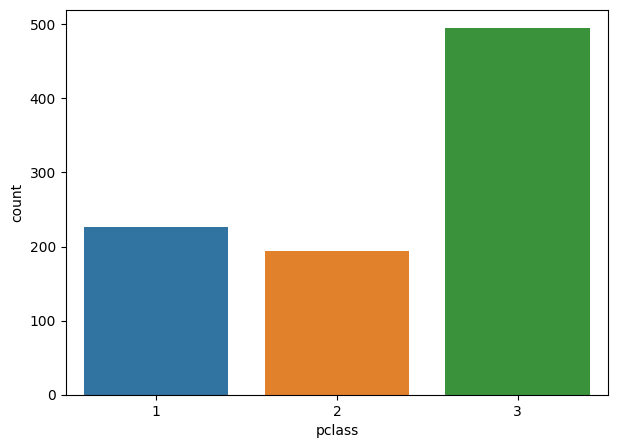

In [46]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data=train_dt, x='pclass', ax=ax)
plt.show()

In [47]:
train_dt[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.577093
1,2,0.391753
2,3,0.280808


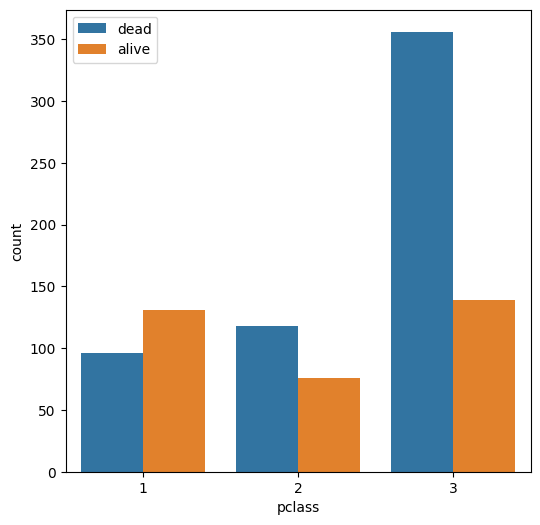

In [48]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(data=train_dt, x='pclass', hue='survived', ax=ax)
ax.legend(labels=['dead', 'alive'])
plt.show()

pclass3의 사망률이 높다

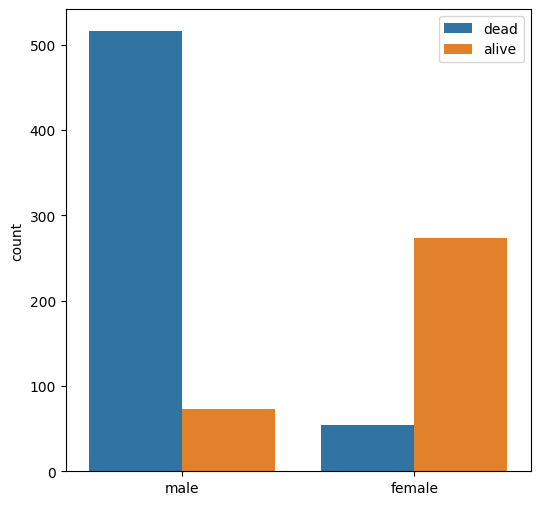

In [49]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(data=train_dt, x='gender', hue='survived', ax=ax)
ax.set(xticklabels=['male', 'female'], xlabel='')
ax.legend(labels=['dead', 'alive'])
plt.show()

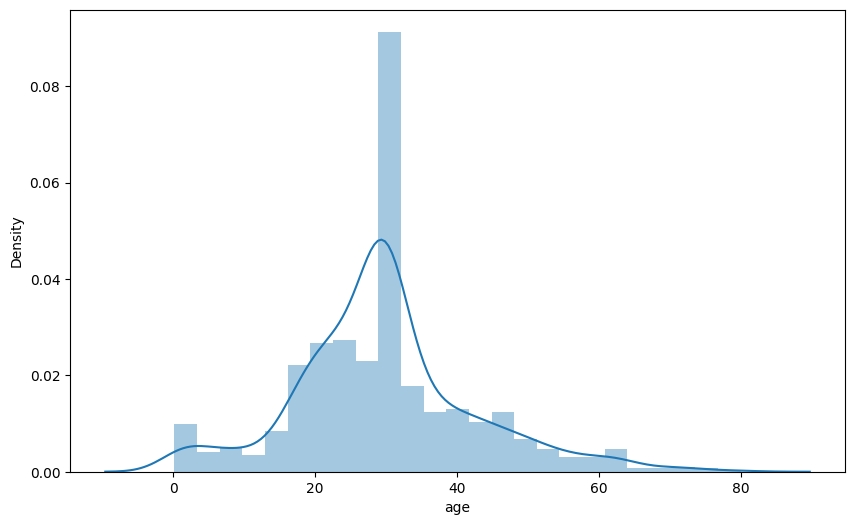

In [50]:
# 나이 분포

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train_dt['age'], bins=25, ax=ax)
plt.show()

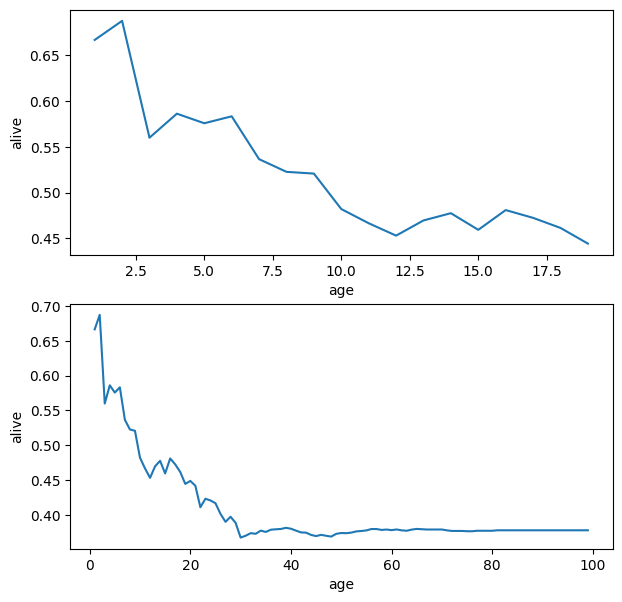

In [51]:
# 나이별 생존률

age_range_survival_ratio = []
age_range_survival_ratio_total = []
# 1살 부터 생존율 구하기
for i in range(0,20):
    age_range_survival_ratio.append(train_dt[train_dt['age'] < i]['survived'].sum() / len(train_dt[train_dt['age'] < i]['survived']))
for i in range(0,100):
    age_range_survival_ratio_total.append(train_dt[train_dt['age'] < i]['survived'].sum() / len(train_dt[train_dt['age'] < i]['survived']))
 

plt.figure(figsize=(7,7))
plt.subplot(2, 1, 1)   
plt.plot(age_range_survival_ratio)

plt.ylabel('alive')
plt.xlabel('age')
plt.subplot(2, 1, 2)   
plt.plot(age_range_survival_ratio_total)

plt.ylabel('alive')
plt.xlabel('age')
 
plt.show()

나이가 어린 사람의 생존률이 높다

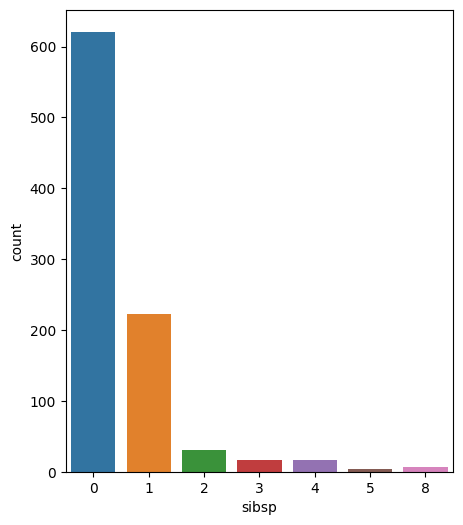

In [52]:
# sibsp 
fig, ax = plt.subplots(figsize=(5,6))
sns.countplot(data=train_dt, x='sibsp')
plt.show()

In [53]:
train_dt[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.531532
2,2,0.433333
0,0,0.333333
5,5,0.250000
3,3,0.235294
6,8,0.166667
4,4,0.125000


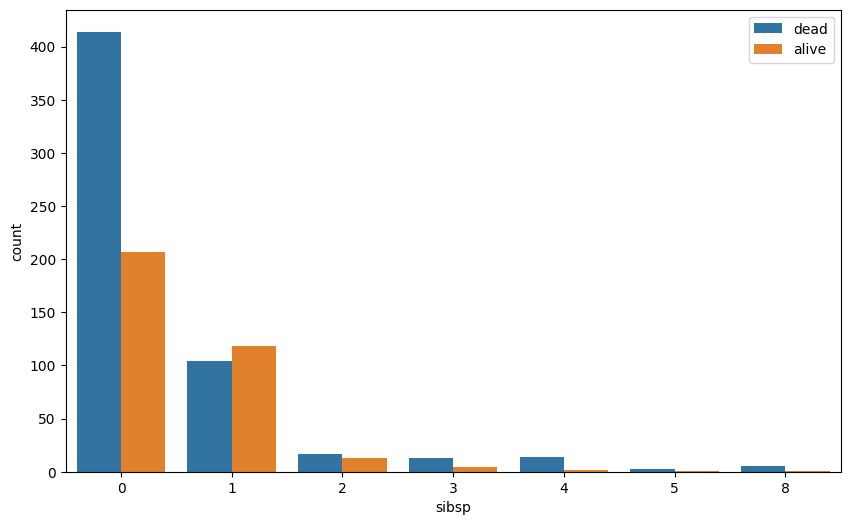

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=train_dt, x='sibsp', hue='survived', ax=ax)
ax.legend(labels=['dead', 'alive'])
plt.show()

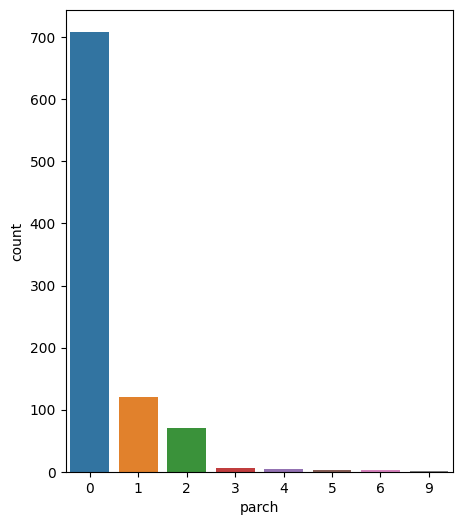

In [55]:
# parch 분포
fig, ax = plt.subplots(figsize=(5,6))
sns.countplot(data=train_dt, x='parch')
plt.show()

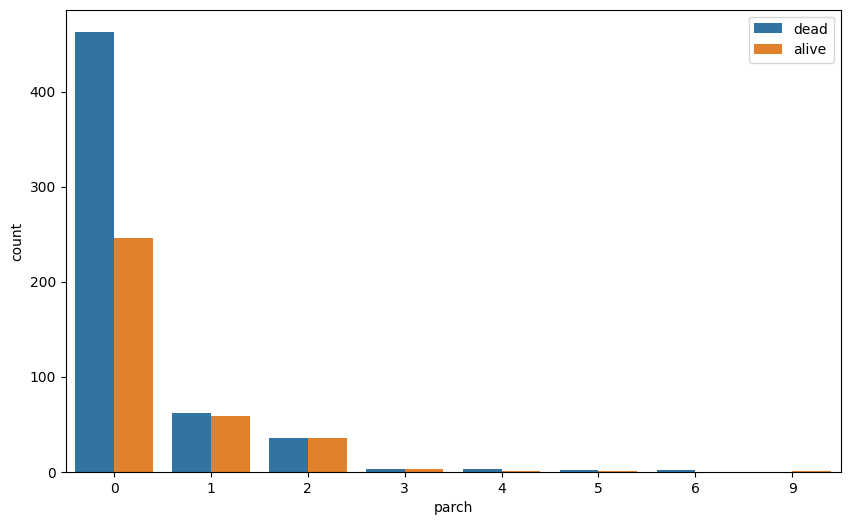

In [56]:
# parch 생존률
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=train_dt, x='parch', hue='survived', ax=ax)
ax.legend(labels=['dead', 'alive'])
plt.show()

In [57]:
# 항구별 사망률

train_dt[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
1,Q,0.493827
0,C,0.486772
2,S,0.331269


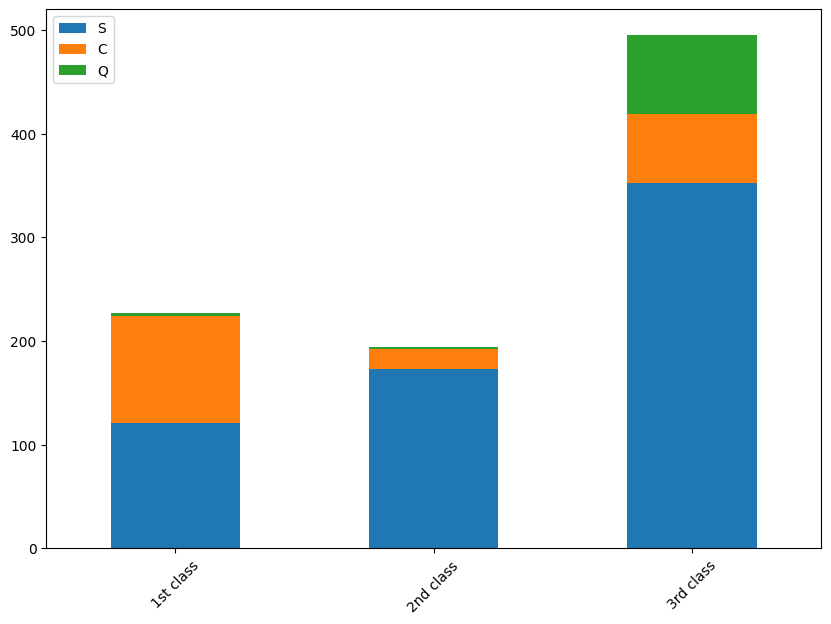

In [58]:
# pclass 별로 데이터를 나눠줍니다
Pclass1 = train_dt[train_dt['pclass']==1]['embarked'].value_counts()
Pclass2 = train_dt[train_dt['pclass']==2]['embarked'].value_counts()
Pclass3 = train_dt[train_dt['pclass']==3]['embarked'].value_counts()
 
# DataFrame으로 만들어서 그래프
fig, ax = plt.subplots(figsize=(10,7))
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked=True, ax=ax)
 
# xlabel 회전
plt.xticks(rotation=45)
 
plt.show()

S항구에 class3인 사람이 많다

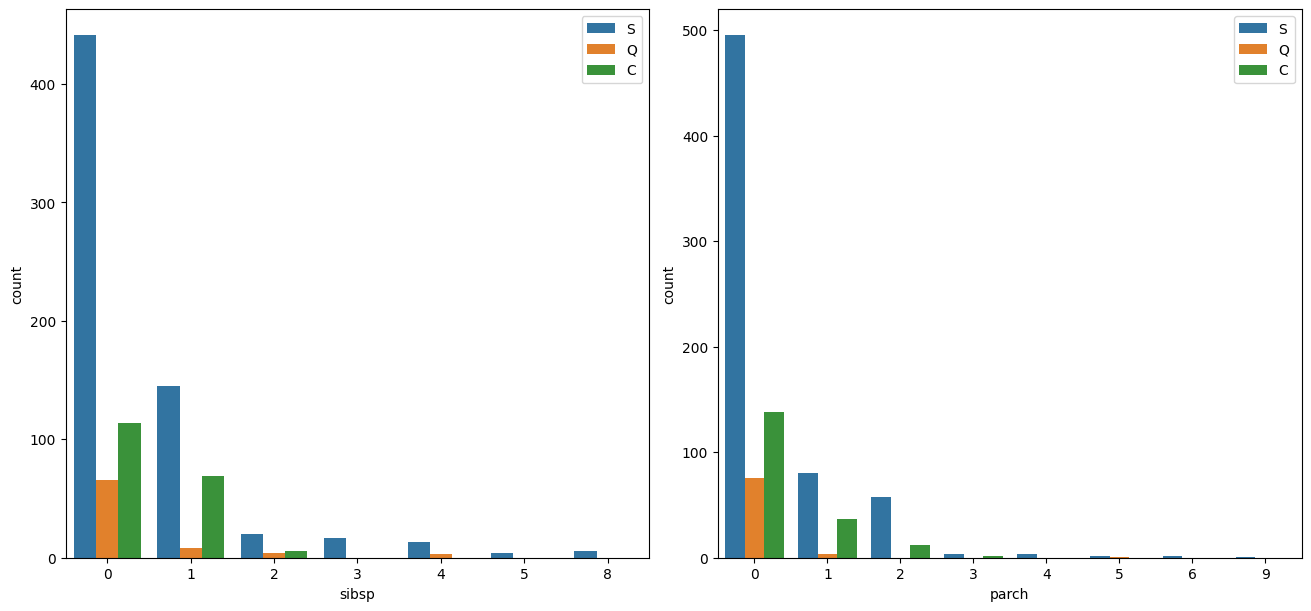

In [59]:
fig, ax = plt.subplots(1,2,figsize=(13,6), constrained_layout=True)
sns.countplot(data=train_dt, x='sibsp', hue='embarked', ax=ax[0])
sns.countplot(data=train_dt, x='parch', hue='embarked', ax=ax[1])

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

S항구에 혼자 탄 사람이 많다

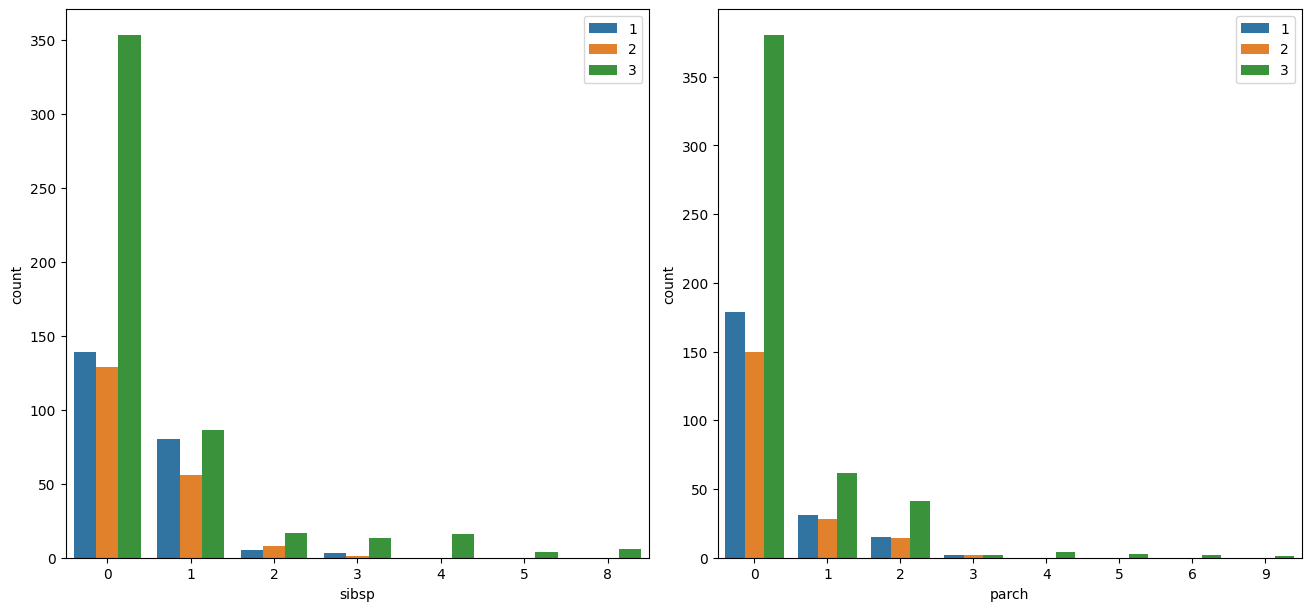

In [60]:
fig, ax = plt.subplots(1,2,figsize=(13,6), constrained_layout=True)

sns.countplot(data=train_dt, x='sibsp', hue='pclass', ax=ax[0])
sns.countplot(data=train_dt, x='parch', hue='pclass', ax=ax[1])

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

plt.show()

S항구에서 혼자 3클래스에 탄 탑승객의 사망률이 높다

# Feature 추가 
> 성별, 나이에 따른 기초대사랑, 키, 몸무게

## 나이, 성별에 따른 기초대사량

https://www.joongang.co.kr/article/3564449#home

In [61]:
def age_gender_change(age=None, gender=None):
    if (age>=0 and age<3 and gender=='male'):
        cal=700
        return cal
    elif (age>=0 and age<3 and gender=='female'):
        cal=700
        return cal
    elif (age>=3 and age<6 and gender=='male'):
        cal=900
        return cal
    elif (age>=3 and age<6 and gender=='female'):
        cal=860
        return cal
    elif (age>=6 and age<9 and gender=='male'):
        cal=1090
        return cal
    elif (age>=6 and age<9 and gender=='female'):
        cal=1000
        return cal
    elif (age>=9 and age<12 and gender=='male'):
        cal=1290
        return cal
    elif (age>=9 and age<12 and gender=='female'):
        cal=1180
        return cal
    elif (age>=12 and age<15 and gender=='male'):
        cal=1480
        return cal
    elif (age>=12 and age<15 and gender=='female'):
        cal=1340
        return cal
    elif (age>=15 and age<18 and gender=='male'):
        cal=1610
        return cal
    elif (age>=15 and age<18 and gender=='female'):
        cal=1300
        return cal
    elif (age>=18 and age<30 and gender=='male'):
        cal=1550
        return cal
    elif (age>=18 and age<30 and gender=='female'):
        cal=1210
        return cal
    elif (age>=30 and age<50 and gender=='male'):
        cal=1500
        return cal
    elif (age>=30 and age<50 and gender=='female'):
        cal=1170
        return cal
    elif (age>=50 and age<70 and gender=='male'):
        cal=1350
        return cal
    elif (age>=50 and age<70 and gender=='female'):
        cal=1110
        return cal
    elif (age>=70 and gender=='male'):
        cal=1220
        return cal
    else:
        cal=1010
        return cal

## 나이, 성별에 따른 키

https://m.blog.naver.com/autjymaym/220600088685

In [62]:
def age_gender_change2(age=None, gender=None):
    if (age>=0 and age<0.25 and gender=='male'):
        height=50.1
        return height
    elif (age>=0 and age<0.25 and gender=='female'):
        height=49.4
        return height
    elif (age>=0.25 and age<0.5 and gender=='male'):
        height=67.6
        return height
    elif (age>=0.25 and age<0.5 and gender=='female'):
        height=66.3
        return height
    elif (age>=0.5 and age<1 and gender=='male'):
        height=76
        return height
    elif (age>=0.5 and age<1 and gender=='female'):
        height=74.8
        return height
    elif (age>=1 and age<1.5 and gender=='male'):
        height=81.2
        return height
    elif (age>=1 and age<1.5 and gender=='female'):
        height=79.9
        return height
    elif (age>=1.5 and age<2 and gender=='male'):
        height=86.2
        return height
    elif (age>=1.5 and age<2 and gender=='female'):
        height=85
        return height
    elif (age>=2 and age<3 and gender=='male'):
        height=93.1
        return height
    elif (age>=2 and age<3 and gender=='female'):
        height=91.9
        return height
    elif (age>=3 and age<4 and gender=='male'):
        height=100.3
        return height
    elif (age>=3 and age<4 and gender=='female'):
        height=99.2
        return height
    elif (age>=4 and age<5 and gender=='male'):
        height=107.2
        return height
    elif (age>=4 and age<5 and gender=='female'):
        height=106.1
        return height
    elif (age>=5 and age<6 and gender=='male'):
        height=113.6
        return height
    elif (age>=5 and age<6 and gender=='female'):
        height=112.5
        return height
    elif (age>=6 and age<7 and gender=='male'):
        height=119.5
        return height
    elif (age>=6 and age<7 and gender=='female'):
        height=118.3
        return height
    elif (age>=7 and age<8 and gender=='male'):
        return 123.7
    elif (age>=7 and age<8 and gender=='female'):
        return 122.4
    elif (age>=8 and age<9 and gender=='male'):
        return 129.1
    elif (age>=8 and age<9 and gender=='female'):
        return 127.8
    elif (age>=9 and age<10 and gender=='male'):
        return 134.2
    elif (age>=9 and age<10 and gender=='female'):
        return 133.5
    elif (age>=10 and age<11 and gender=='male'):
        return 139.4
    elif (age>=10 and age<11 and gender=='female'):
        return 139.9
    elif (age>=11 and age<12 and gender=='male'):
        return 145.3
    elif (age>=11 and age<12 and gender=='female'):
        return 146.7
    elif (age>=12 and age<13 and gender=='male'):
        return 151.8
    elif (age>=12 and age<13 and gender=='female'):
        return 152.7
    elif (age>=13 and age<14 and gender=='male'):
        return 159
    elif (age>=13 and age<14 and gender=='female'):
        return 156.6
    elif (age>=14 and age<15 and gender=='male'):
        return 165.5
    elif (age>=14 and age<15 and gender=='female'):
        return 158.5
    elif (age>=15 and age<16 and gender=='male'):
        return 169.7
    elif (age>=15 and age<16 and gender=='female'):
        return 159.4
    elif (age>=16 and age<17 and gender=='male'):
        return 171.8
    elif (age>=16 and age<17 and gender=='female'):
        return 160
    elif (age>=17 and age<18 and gender=='male'):
        return 172.8
    elif (age>=17 and age<18 and gender=='female'):
        return 160.4
    elif (age>=18 and gender=='male'):
        height=173.4
        return height
    else:
        height=160.7
        return height

## 나이, 성별에 따른 몸무게

In [63]:
def age_gender_change3(age=None, gender=None):
    if (age>=0 and age<0.25 and gender=='male'):
        return 3.4
    elif (age>=0 and age<0.25 and gender=='female'):
        return 3.3
    elif (age>=0.25 and age<0.5 and gender=='male'):
        return 8
    elif (age>=0.25 and age<0.5 and gender=='female'):
        return 7.5
    elif (age>=0.5 and age<1 and gender=='male'):
        return 9.9
    elif (age>=0.5 and age<1 and gender=='female'):
        return 9.4
    elif (age>=1 and age<1.5 and gender=='male'):
        return 11.1
    elif (age>=1 and age<1.5 and gender=='female'):
        return 10.5
    elif (age>=1.5 and age<2 and gender=='male'):
        return 12.3
    elif (age>=1.5 and age<2 and gender=='female'):
        return 11.7
    elif (age>=2 and age<3 and gender=='male'):
        return 14
    elif (age>=2 and age<3 and gender=='female'):
        return 13.4
    elif (age>=3 and age<4 and gender=='male'):
        return 15.9
    elif (age>=3 and age<4 and gender=='female'):
        return 15.3
    elif (age>=4 and age<5 and gender=='male'):
        return 18.1
    elif (age>=4 and age<5 and gender=='female'):
        return 17.4
    elif (age>=5 and age<6 and gender=='male'):
        return 20.4
    elif (age>=5 and age<6 and gender=='female'):
        return 19.6
    elif (age>=6 and age<7 and gender=='male'):
        return 22.9
    elif (age>=6 and age<7 and gender=='female'):
        return 22
    elif (age>=7 and age<8 and gender=='male'):
        return 24.8
    elif (age>=7 and age<8 and gender=='female'):
        return 23.9
    elif (age>=8 and age<9 and gender=='male'):
        return 27.8
    elif (age>=8 and age<9 and gender=='female'):
        return 26.9
    elif (age>=9 and age<10 and gender=='male'):
        return 31.3
    elif (age>=9 and age<10 and gender=='female'):
        return 30.5
    elif (age>=10 and age<11 and gender=='male'):
        return 35.5
    elif (age>=10 and age<11 and gender=='female'):
        return 35.7
    elif (age>=11 and age<12 and gender=='male'):
        return 40.3
    elif (age>=11 and age<12 and gender=='female'):
        return 39.2
    elif (age>=12 and age<13 and gender=='male'):
        return 45.5
    elif (age>=12 and age<13 and gender=='female'):
        return 43.8
    elif (age>=13 and age<14 and gender=='male'):
        return 50.7
    elif (age>=13 and age<14 and gender=='female'):
        return 47.8
    elif (age>=14 and age<15 and gender=='male'):
        return 55.4
    elif (age>=14 and age<15 and gender=='female'):
        return 50.9
    elif (age>=15 and age<16 and gender=='male'):
        return 59.4
    elif (age>=15 and age<16 and gender=='female'):
        return 52.8
    elif (age>=16 and age<17 and gender=='male'):
        return 62.4
    elif (age>=16 and age<17 and gender=='female'):
        return 53.6
    elif (age>=17 and age<18 and gender=='male'):
        return 64.5
    elif (age>=17 and age<18 and gender=='female'):
        return 53.9
    elif (age>=18 and gender=='male'):
        return 65.8
    else:
        return 54.1

In [64]:
# age 변환
def age_change(age=None):
    if (age>=0 and age<2):
        return 0
    elif (age>=2 and age<6):
        return 1
    elif (age>=6 and age<9):
        return 2
    elif (age>=9 and age<12):
        return 3
    elif (age>=12 and age<16):
        return 4
    elif (age>=16 and age<23):
        return 5
    elif (age>=23 and age<30):
        return 6
    elif (age>=30 and age<40):
        return 7
    else:
        return 8


In [65]:
o_train['title'] = o_train['name'].str.extract('([A-za-z]+)\.', expand=False)
o_test['title'] = o_test['name'].str.extract('([A-za-z]+)\.', expand=False)


title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }

o_train['title2']=o_train['title'].map(title_mapping)
o_test['title2']=o_test['title'].map(title_mapping)

## Feautre 함수 적용

In [66]:
o_train['cal'] = o_train.apply(lambda x: age_gender_change(age=x['age'], gender=x['gender']), axis=1)
o_test['cal'] = o_test.apply(lambda x: age_gender_change(age=x['age'], gender=x['gender']), axis=1)

o_train['height'] = o_train.apply(lambda x: age_gender_change2(age=x['age'], gender=x['gender']), axis=1)
o_test['height'] = o_test.apply(lambda x: age_gender_change2(age=x['age'], gender=x['gender']), axis=1)

o_train['weight'] = o_train.apply(lambda x: age_gender_change3(age=x['age'], gender=x['gender']), axis=1)
o_test['weight'] = o_test.apply(lambda x: age_gender_change3(age=x['age'], gender=x['gender']), axis=1)

o_train['bmi'] = o_train.apply(lambda x: x['weight']/x['height']/x['height']*10000, axis=1)
o_test['bmi'] = o_test.apply(lambda x: x['weight']/x['height']/x['height']*10000, axis=1)

o_train['age2'] = o_train.apply(lambda x: age_change(age=x['age']), axis=1)
o_test['age2'] = o_test.apply(lambda x: age_change(age=x['age']), axis=1)

o_train['cabin2']=o_train.apply(lambda x: x['cabin'][0], axis=1)
o_test['cabin2']=o_train.apply(lambda x: x['cabin'][0], axis=1)
#o_train['cabin2'] = o_train['cabin2'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8})
#o_test['cabin2'] = o_test['cabin2'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8})


## feature 추가

In [67]:
# 0220

o_train['parch+sibsp'] = o_train.apply(lambda x: x['parch']+x['sibsp']+1, axis=1)
o_test['parch+sibsp'] = o_test.apply(lambda x: x['parch']+x['sibsp']+1, axis=1)

# o_train['parch*sibsp'] = o_train.apply(lambda x: x['parch']*x['sibsp'], axis=1)
# o_test['parch*sibsp'] = o_test.apply(lambda x: x['parch']*x['sibsp'], axis=1)


# 0221
o_train['sex'] = o_train['gender'].map({'male':1, 'female':0})
o_test['sex'] = o_test['gender'].map({'male':1, 'female':0})

o_train['name'] = o_train['name'].map(title_mapping)
o_test['name'] = o_test['name'].map(title_mapping)

o_train['sex+p+s']=o_train['sex']+o_train['parch+sibsp']
o_test['sex+p+s']=o_test['sex']+o_test['parch+sibsp']

o_train['sex*p+s']=o_train['sex']*o_train['parch+sibsp']
o_test['sex*p+s']=o_test['sex']*o_test['parch+sibsp']

# o_train['sex+p*s']=o_train['sex']+o_train['parch*sibsp']
# o_test['sex+p*s']=o_test['sex']+o_test['parch*sibsp']

# o_train['sex*p*s']=o_train['sex']*o_train['parch*sibsp']
# o_test['sex*p*s']=o_test['sex']*o_test['parch*sibsp']


# 0222
o_train['ps*pclass'] = o_train.apply(lambda x: x['parch+sibsp']*x['pclass'], axis=1)
o_test['ps*pclass'] = o_test.apply(lambda x: x['parch+sibsp']*x['pclass'], axis=1)

o_train['embarked'] = o_train['embarked'].map({'Q':1, 'C':2, 'S':3})
o_test['embarked'] = o_test['embarked'].map({'Q':1, 'C':2, 'S':3})

o_train['multi'] = o_train['parch+sibsp']-o_train['pclass']-o_train['embarked']-o_train['age2']
o_test['multi'] = o_test['parch+sibsp']-o_test['pclass']-o_test['embarked']-o_test['age2']

o_train['sum'] = o_train['parch+sibsp']/o_train['pclass']/o_train['embarked']
o_test['sum'] = o_test['parch+sibsp']/o_test['pclass']/o_test['embarked']

# 0223
# height - age2
o_train['ha21'] =o_train['height']-o_train['age2']
o_test['ha21'] =o_test['height']-o_test['age2']

o_train['ha22'] =o_train['height']+o_train['age2']
o_test['ha22'] =o_test['height']+o_test['age2']

o_train['ha23'] =o_train['height']/o_train['age2']
o_test['ha23'] =o_test['height']/o_test['age2']

# height - pclass
o_train['hp3'] =o_train['height']*o_train['pclass']
o_test['hp3'] =o_test['height']*o_test['pclass']

o_train['hp4'] =o_train['height']/o_train['pclass']
o_test['hp4'] =o_test['height']/o_test['pclass']

# height - parch+sibsp
o_train['hps1'] =o_train['height']-o_train['parch+sibsp']
o_test['hps1'] =o_test['height']-o_test['parch+sibsp']

o_train['hps2'] =o_train['height']+o_train['parch+sibsp']
o_test['hps2'] =o_test['height']+o_test['parch+sibsp']

o_train['hps3'] =o_train['height']/o_train['parch+sibsp']
o_test['hps3'] =o_test['height']/o_test['parch+sibsp']

# pclass - sex
o_train['ps1'] =o_train['pclass']-o_train['sex']
o_test['ps1'] =o_test['pclass']-o_test['sex']

o_train['ps2'] =o_train['pclass']+o_train['sex']
o_test['ps2'] =o_test['pclass']+o_test['sex']

o_train['ps3'] =o_train['pclass']*o_train['sex']
o_test['ps3'] =o_test['pclass']*o_test['sex']

o_train['ps4'] =o_train['pclass']/o_train['sex']
o_test['ps4'] =o_test['pclass']/o_test['sex']

# sex - parch + sibsp
o_train['sps1'] =o_train['parch+sibsp']-o_train['sex']
o_test['sps1'] =o_test['parch+sibsp']-o_test['sex']

o_train['sps2'] =o_train['parch+sibsp']+o_train['sex']
o_test['sps2'] =o_test['parch+sibsp']+o_test['sex']

o_train['sps3'] =o_train['parch+sibsp']*o_train['sex']
o_test['sps3'] =o_test['parch+sibsp']*o_test['sex']

o_train['sps4'] =o_train['parch+sibsp']/o_train['sex']
o_test['sps4'] =o_test['parch+sibsp']/o_test['sex']

# parch+sibsp / pclass

# cabin + gender
o_train['cage'] = o_train['cabin'] + o_train['gender']
o_test['cage'] = o_test['cabin'] + o_test['gender']


o_train['cage2'] = o_train['cabin2'] + o_train['gender']
o_test['cage2'] = o_test['cabin2'] + o_test['gender']

# ps2, age2
o_train['psage21'] =o_train['ps2']-o_train['age2']
o_test['psage21'] =o_test['ps2']-o_test['age2']

o_train['psage22'] =o_train['ps2']+o_train['age2']
o_test['psage22'] =o_test['ps2']+o_test['age2']

# bmi cal
o_train['bmical1'] =o_train['cal']-o_train['bmi']
o_test['bmical1'] =o_test['cal']-o_test['bmi']

o_train['bmical2'] =o_train['cal']+o_train['bmi']
o_test['bmical2'] =o_test['cal']+o_test['bmi']

o_train['bmical3'] =o_train['cal']/o_train['bmi']
o_test['bmical3'] =o_test['cal']/o_test['bmi']

# embarked / pclass 
o_train['emp'] =o_train['embarked']*o_train['pclass']
o_test['emp'] =o_test['embarked']*o_test['pclass']

o_train['hp341'] =o_train['hp3']-o_train['hp4']
o_test['hp341'] =o_test['hp3']-o_test['hp4']

o_train['hp342'] =o_train['hp3']+o_train['hp4']
o_test['hp342'] =o_test['hp3']+o_test['hp4']

o_train['hp343'] =o_train['hp3']/o_train['hp4']
o_test['hp343'] =o_test['hp3']/o_test['hp4']

o_train['fare/pclass'] =o_train['fare']/o_train['pclass']
o_test['fare/pclass'] =o_test['fare']/o_test['pclass']

o_train['ps/pclass'] =o_train['parch+sibsp']/o_train['pclass']
o_test['ps/pclass'] =o_test['parch+sibsp']/o_test['pclass']

o_train['sex*ps'] =o_train['parch+sibsp']*o_train['sex']
o_test['sex*ps'] =o_test['parch+sibsp']*o_test['sex']

o_train['sex*fare'] =o_train['sex']*o_train['fare']
o_test['sex*fare'] =o_test['sex']*o_test['fare']

o_train['sex*fare/pclass'] =o_train['sex']*o_train['fare']/o_train['pclass']
o_test['sex*fare/pclass'] =o_test['sex']*o_test['fare']/o_test['pclass']

o_train['sex*fare/pclass/age2'] =o_train['sex']*o_train['fare']/o_train['pclass']/(o_test['age2']+0.0000001)
o_test['sex*fare/pclass/age2'] =o_test['sex']*o_test['fare']/o_test['pclass']/(o_test['age2']+0.0000001)

o_train['sex*title'] =o_train['sex']*o_train['title']
o_test['sex*title'] =o_test['sex']*o_test['title']

o_train['sex*fare/pclass/age'] =o_train['sex']*o_train['fare']/o_train['pclass']/(o_test['age']+0.0000001)
o_test['sex*fare/pclass/age'] =o_test['sex']*o_test['fare']/o_test['pclass']/(o_test['age']+0.0000001)

o_train['sex/pclass/age*title2'] =o_train['sex']/o_train['pclass']/(o_test['age']+0.0000001)*o_train['title2']
o_test['sex/pclass/age*title2'] =o_test['sex']/o_test['pclass']/(o_test['age']+0.0000001)*o_train['title2']

o_train['cageti'] = o_train['cabin'] + o_train['gender']+o_train['title']
o_test['cageti'] = o_test['cabin'] + o_test['gender']+o_test['title']



# Scaling

In [68]:
scaling_cols = ['age', 'fare', 'hp3', 'hp4',  'hps2', 'bmical3', 'hp341', 'fare/pclass']

x_tr = o_train[scaling_cols]
y_tr = o_train['survived']

x_te = o_test[scaling_cols]
x_tr.shape, y_tr.shape, x_te.shape

from sklearn.preprocessing import QuantileTransformer
qtf = QuantileTransformer()
qtf.fit(x_tr)
x_train_scaled = qtf.transform(x_tr)
x_test_scaled = qtf.transform(x_te)

In [69]:
x_tr.isnull().sum().sum(), x_te.isnull().sum().sum()

(0, 0)

In [70]:
from sklearn.preprocessing import PowerTransformer
ptf = PowerTransformer()
#ptf.fit(x_tr)
#x_train_scaled = ptf.transform(x_tr)
#x_test_scaled = ptf.transform(x_te)

from sklearn.preprocessing import QuantileTransformer
qtf = QuantileTransformer()
qtf.fit(x_tr)
x_train_scaled = qtf.transform(x_tr)
x_test_scaled = qtf.transform(x_te)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
#std.fit(x_tr)
#x_train_scaled = std.transform(x_tr)
#x_test_scaled = std.transform(x_te)

from sklearn.preprocessing import MinMaxScaler
mas = MinMaxScaler()
#mas.fit(x_tr)
#x_train_scaled = mas.transform(x_tr)
#x_test_scaled = mas.transform(x_te)

from sklearn.preprocessing import RobustScaler
#rbs = RobustScaler()
#x_train_scaled = rbs.fit_transform(x_tr)
#x_test_scaled = rbs.transform(x_te)

from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
#mas.fit(x_tr)
#x_train_scaled = mas.transform(x_tr)
#x_test_scaled = mas.transform(x_te)


In [71]:
x_tr=pd.DataFrame(x_train_scaled, columns=scaling_cols).reset_index(drop=True)
x_te=pd.DataFrame(x_test_scaled, columns=scaling_cols).reset_index(drop=True)
x_te.shape

(393, 8)

In [72]:
x_tr.isnull().sum().sum(), x_te.isnull().sum().sum()

(0, 0)

# Encoding


## Onehot Encoding

In [73]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoding_cols1 = []

x_tr1 = o_train[encoding_cols1]
x_te1 = o_test[encoding_cols1]

In [74]:
encoder = ce.OneHotEncoder(use_cat_names=True)

enco_tr = pd.DataFrame()
enco_te = pd.DataFrame()

for col in x_tr1.columns:
  _enco = encoder.fit_transform(x_tr1[col].astype('category'))
  enco_tr = pd.concat([enco_tr, _enco], axis=1)

  _enco = encoder.transform(x_te1[col].astype('category'))
  enco_te = pd.concat([enco_te, _enco], axis=1)

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.columns

(0, 0) / (0, 0)


Index([], dtype='object')

In [75]:
x_tr1 = x_tr1.reset_index(drop=True)
x_te1 = x_te1.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

x_tr1.shape, enco_tr.shape

((916, 0), (0, 0))

In [76]:
encoding_tr1 = pd.concat([x_tr1,enco_tr],axis=1).reset_index(drop=True)
encoding_te1 = pd.concat([x_te1,enco_te],axis=1).reset_index(drop=True)

print(f'{encoding_tr1.shape} / {encoding_te1.shape}')
encoding_tr1.columns

(916, 0) / (393, 0)


Index([], dtype='object')

## Ordinal Encoding

In [77]:
encoding_cols2 = [ 'emp', 'parch+sibsp','sps1','sps2', 'title']
encoder = ce.OrdinalEncoder(cols = encoding_cols2)

x_tr2 = o_train[encoding_cols2]
x_te2 = o_test[encoding_cols2]

In [78]:
enco_tr = encoder.fit_transform(x_tr2)
enco_te = encoder.transform(x_te2)

In [79]:

x_tr2 = x_tr2.reset_index(drop=True)
x_te2 = x_te2.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

encoding_tr2 = pd.concat([enco_tr],axis=1).reset_index(drop=True)
encoding_te2 = pd.concat([enco_te],axis=1).reset_index(drop=True)

x_te.isnull().sum(), encoding_te1.isnull().sum(), encoding_te2.isnull().sum()

encoding_tr2.columns

Index(['emp', 'parch+sibsp', 'sps1', 'sps2', 'title'], dtype='object')

## Target Encoding

In [80]:
encoding_cols3 = ['cage']
encoder = ce.TargetEncoder()

x_tr3 = o_train[encoding_cols3]
x_te3 = o_test[encoding_cols3]
target_tr = o_train['survived']

In [81]:
enco_tr = encoder.fit_transform(x_tr3.reset_index(drop=True), target_tr.reset_index(drop=True))
enco_te = encoder.transform(x_te3)

x_tr3 = x_tr3.reset_index(drop=True)
x_te3 = x_te3.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

encoding_tr3 = pd.concat([enco_tr],axis=1).reset_index(drop=True)
encoding_te3 = pd.concat([enco_te],axis=1).reset_index(drop=True)

encoding_tr3.columns

Index(['cage'], dtype='object')

In [82]:
encoding_tr3.isnull().sum(), encoding_te3.isnull().sum()

(cage    0
 dtype: int64,
 cage    0
 dtype: int64)

# Scaling & Enncoding DataFrame 합치기

In [83]:
df_tr = pd.concat([x_tr, encoding_tr1, encoding_tr2, encoding_tr3],axis=1).reset_index(drop=True)
df_te = pd.concat([x_te, encoding_te1, encoding_te2, encoding_te3],axis=1).reset_index(drop=True)
df_tr.drop(encoding_cols1, inplace=True, axis=1)
df_te.drop(encoding_cols1, inplace=True, axis=1)
encoding_tr2.columns

Index(['emp', 'parch+sibsp', 'sps1', 'sps2', 'title'], dtype='object')

In [84]:
y = o_train['survived']

# train_test_split

In [85]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(df_tr, y, test_size=0.2, stratify=o_train['survived'], random_state=21)

In [86]:
X_tr.shape, X_te.shape, y_tr.shape

((732, 14), (184, 14), (732,))

In [87]:
test = pd.concat([df_te, o_test['passengerid']],axis=1).reset_index(drop=True)
test.set_index(['passengerid'], inplace=True)
test.shape

(393, 14)

# XGBoosting

In [88]:
from xgboost import XGBClassifier, plot_importance

hp = {
    "random_state" : 42,
    "max_depth" : 3,
    "n_estimators" : 400, 
    "learning_rate": 0.01,
    "min_child_weight": 1,
    "gamma": 4
}

xgb = XGBClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {xgb.score(X_tr, y_tr)} / 테스트용 평가지표: {xgb.score(X_te, y_te)}')
test_pred_xgb = xgb.predict_proba(test)[:, 1]

훈련용 평가지표: 0.9139344262295082 / 테스트용 평가지표: 0.875


# 점수확인

In [89]:
from sklearn.metrics import roc_curve, auc 
# xgb
pred = xgb.predict_proba(X_te)[:, 1]
fpr, tpr, _ = roc_curve(y_te, pred) 
auc(fpr, tpr)

0.9186716791979951

# 결과 저장

In [90]:
# 변수명, 파일명 수정
submission = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\submission.csv")
submission['survived'] = test_pred_xgb

submission.head()

,passengerid,survived
0,916,0.740338
1,917,0.919232
2,918,0.759542
3,919,0.089305
4,920,0.964304


In [91]:
submission.to_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\submission0223_3.csv", header=True, index = False)

# feature_importances 분석

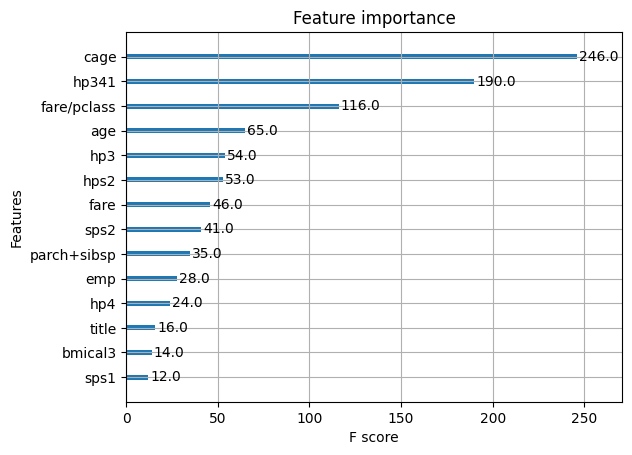

In [92]:
import matplotlib.pyplot as plt
plot_importance(xgb)
plt.show()

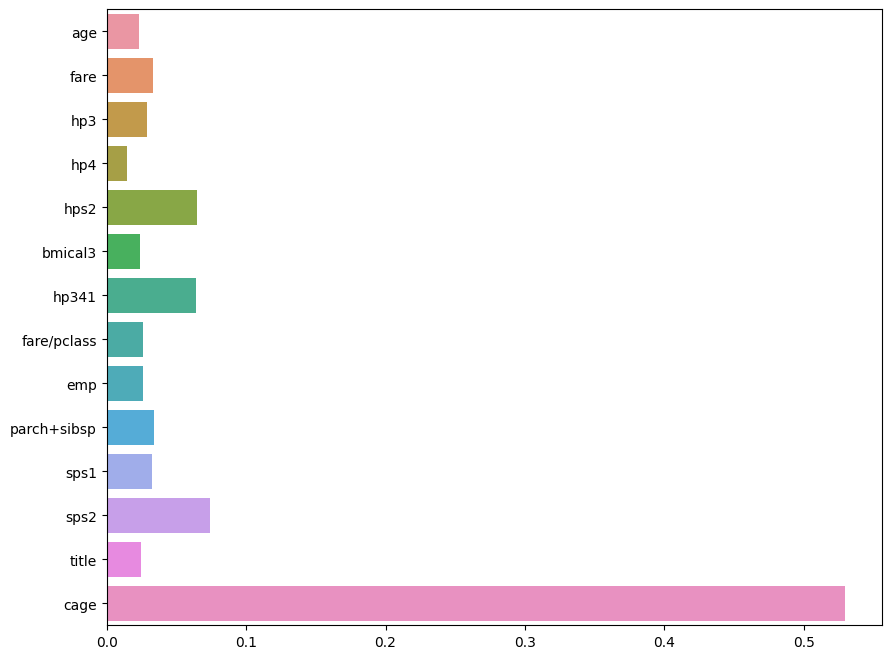

In [93]:
plt.figure(figsize=(10,8))

sns.barplot(x=xgb.feature_importances_,y=df_tr.columns)
plt.show()